# This example will explore geometry and sampling probabilities in high-dimensional spaces. Consider a two-dimensional square dart board with length L = 2 on both sides and a circle of radius R = 1 in the middle. Write a program to throw 10 000 darts by generating a uniform random x and y position on the square. Compute the radius for each point and compute what fraction land inside the circle (i.e., how many have radius < 1). Is this consistent with your expectation based on the area of the circle and the square?
# Repeat this experiment, throwing 10 000 darts randomly (sampled from a uni- form distribution) on an N -dimensional cube (length L = 2) with an N -dimensional sphere inside (radius R = 1), for N = 2 through N = 10. For a given N, what fraction of the points land inside the sphere. Plot this fraction versus N. Also compute the histogram of the radii of the randomly sampled points for each N and plot these. What trends do you notice in the data?

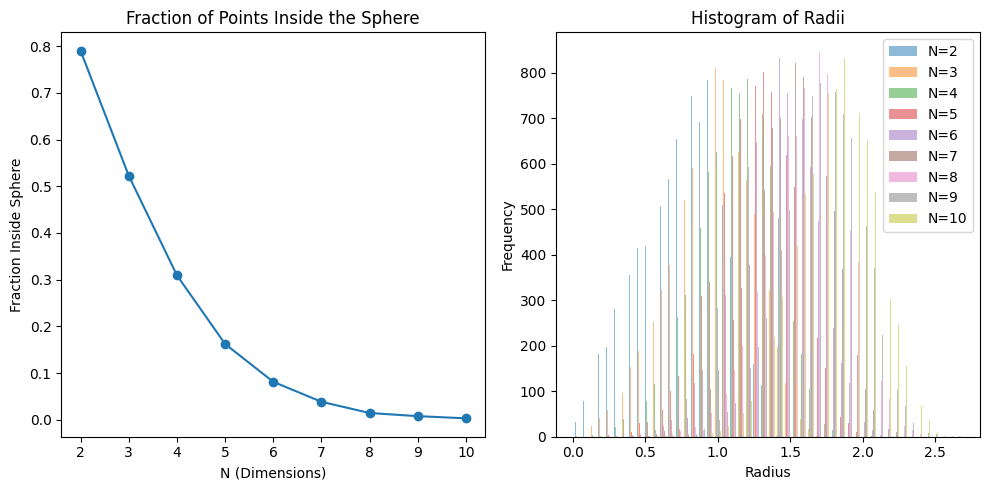

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def throw_darts(N, num_darts):
    inside_circle_count = 0
    radii = []

    for _ in range(num_darts):
        # Generate N random points within the N-dimensional cube [-1, 1]^N
        points = 2 * np.random.random(N) - 1

        # Compute the radius for the point
        radius = np.linalg.norm(points)

        # Check if the point is inside the N-dimensional sphere
        if radius <= 1:
            inside_circle_count += 1

        radii.append(radius)

    fraction_inside_circle = inside_circle_count / num_darts

    return fraction_inside_circle, radii

N_values = list(range(2, 11))
fractions = []
radii_histograms = []

for N in N_values:
    fraction, radii = throw_darts(N, 10000)
    fractions.append(fraction)
    radii_histograms.append(radii)

# Plot the fraction of points inside the sphere for each N
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(N_values, fractions, marker='o')
plt.title("Fraction of Points Inside the Sphere")
plt.xlabel("N (Dimensions)")
plt.ylabel("Fraction Inside Sphere")

# Plot histograms of radii for each N
plt.subplot(1, 2, 2)
plt.hist(radii_histograms, bins=50, alpha=0.5, label=[f"N={N}" for N in N_values])
plt.legend()
plt.title("Histogram of Radii")
plt.xlabel("Radius")
plt.ylabel("Frequency")
plt.tight_layout()

plt.show()
